# Simulate transparency vs airmass at LSST
=======================================================================


- Sylvie Dagoret-Campagne
- affliliation : IJCLAB/IN2P3/CNRS
- creation date :  24 February 2020
- last update : October 16th 2022


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
import numpy as np

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [4]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(12,6)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points 

In [5]:
from scipy.interpolate import interp1d

In [6]:
from libradtranpy import libsimulateVisible

libradtranpath= /home/joseph/libRadtran/


In [7]:
os.getenv('LIBRADTRANDIR')

'/home/joseph/libRadtran'

In [8]:
AMMIN=1
AMMAX=3.1
AMSTEP = 0.1
all_am=np.arange(AMMIN,AMMAX,AMSTEP)
pressure = 0. # use default value
pwv=4.0
aer=0
ozone=300.
cloudext=0
atmStd='us'

In [9]:
NBOBS=len(all_am)

In [10]:
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBOBS)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange( NBOBS), alpha=1)

In [11]:
all_trans = []
for index in np.arange(NBOBS):
    am = all_am[index]
    print("simulate index=",index," airmass = ",am)
    path,thefile=libsimulateVisible.ProcessSimulation(am,pwv,ozone,pressure,
                                                      prof_str=atmStd,proc_str='sa',cloudext=cloudext)
    data = np.loadtxt(os.path.join(path,thefile))
    wl = data[:,0]
    atm = data[:,1] 
    all_trans.append(atm)

simulate index= 0  airmass =  1.0
simulate index= 1  airmass =  1.1
simulate index= 2  airmass =  1.2000000000000002
simulate index= 3  airmass =  1.3000000000000003
simulate index= 4  airmass =  1.4000000000000004
simulate index= 5  airmass =  1.5000000000000004
simulate index= 6  airmass =  1.6000000000000005
simulate index= 7  airmass =  1.7000000000000006
simulate index= 8  airmass =  1.8000000000000007
simulate index= 9  airmass =  1.9000000000000008
simulate index= 10  airmass =  2.000000000000001


******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from  0.500000 to 0.500055
******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from  0.500000 to 0.500055
******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from  0.500000 to 0.500055
******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from  0.500000 to 0.500055
******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from  0.500000 to 0.500055
******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from  0.500000 to 0.500055
******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from 

simulate index= 11  airmass =  2.100000000000001
simulate index= 12  airmass =  2.200000000000001
simulate index= 13  airmass =  2.300000000000001
simulate index= 14  airmass =  2.4000000000000012
simulate index= 15  airmass =  2.5000000000000013
simulate index= 16  airmass =  2.6000000000000014
simulate index= 17  airmass =  2.7000000000000015
simulate index= 18  airmass =  2.8000000000000016
simulate index= 19  airmass =  2.9000000000000017
simulate index= 20  airmass =  3.0000000000000018


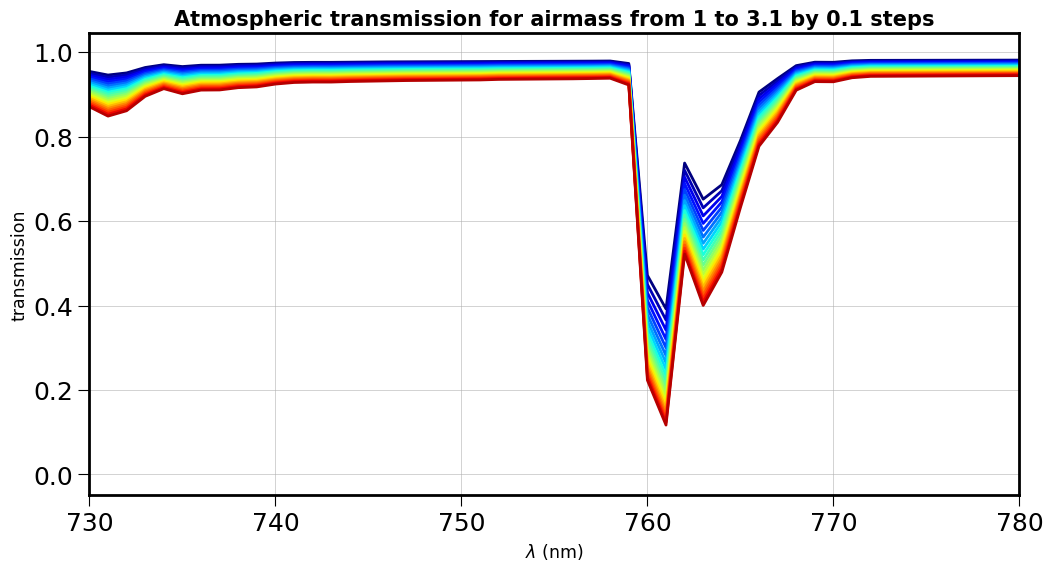

In [14]:
for index in np.arange(NBOBS):   
    plt.plot(wl,all_trans[index],'-',color=all_colors[index])
plt.xlim(300,1200)
plt.grid()
plt.title(f"Atmospheric transmission for airmass from {AMMIN} to {AMMAX} by {AMSTEP} steps")
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("transmission")
#plt.ylim(0.5,1)
plt.xlim(730,780)
figname="multitransmission.png"
plt.savefig(figname)